# Messing around with code so I can figure out what it does

In this notepad I will be using funcitions or general code stuff I didn't understand, and mess around with them so I can understand what they do. Once I figure out what it does/how it works/etc I will right a little description and give a clear example of its use.

I have created an simple excel file which is what I will be taking my data from. This makes it easier to see a before/after

In [1]:
#importing all the things
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from pandas_profiling import ProfileReport
RNG_SEED = 42
np.random.seed(seed = RNG_SEED)

In [2]:
#importing data
PATH = os.getcwd()
print(PATH)

data_path = os.path.join(PATH, "../bullshit/messin.xlsx")
print(data_path)

df = pd.read_excel(data_path) #note that not using .read_csv
print(df)

C:\Users\sweet\Documents\GitHub\Rewriting-Best_Practices\notebooks
C:\Users\sweet\Documents\GitHub\Rewriting-Best_Practices\notebooks\../bullshit/messin.xlsx
     x  y I made up      sinx for bools  f for f
0    0         0.00  0.000000         1        0
1    1         0.50  0.841471         f        1
2    2         1.00  0.909297         1       -1
3    3         1.50  0.141120       NaN       -4
4    4         2.00 -0.756802         1       -5
5    5         2.50 -0.958924       NaN        5
6    6         3.00 -0.279415         1        6
7    7         3.75  0.656987       NaN      -35
8    8         4.50  0.989358         1        8
9    9         9.00  0.412118       NaN       -2
10  10         6.00 -0.544021         1       10
11  11         5.00 -0.999990       NaN     -100
12  12         8.00 -0.536573         1       -1
13  13         7.00  0.420167         2        3
14  14         9.00  0.990607         1       -1
15  15        10.00  0.650288       NaN       15
16  16   

## df.loc[] and df.iloc[]

In [3]:
#Renaming a few indexes just to show
rename_789 = {7:"bob",8:"pete",9:"rob"}
df = df.rename(rename_789)

#finding single row
example = df.loc["bob"]
print(example)

#finding many rows
example = df.loc[["bob","rob", 1]]
print("\n",example)

#using the .index for both of the above
example = df.loc["bob"].index #df.loc[] returns column heading as indicies and row values as columns
print("\n",example)           #this means .index will return column heading, as they are now indicies

example = df.loc[["bob","rob", 1]].index #df.loc[[]] returns a mini dataframe, no swapping of column headers to indicies
print("\n",example)                      #therefore just returns indicies


#.iloc just does this by integer positions instead of labels, from 0 to len - 1
print(f"\n\nNow using .iloc instead of .loc")
#example = df.iloc["bob"]          THIS GIVES AN ERROR, PROPER USE BELOW
#print("\n",example)
example = df.iloc[7] #bob is index 7 in the df
print("\n",example)

example = df.iloc[[7,8,1]]
print("\n",example)

#using it for bools
bool_nan = pd.isnull(df["for bools"])
print("\n\n\n", bool_nan)
example = df.loc[bool_nan].index
print("\n",example)


x                     7
y I made up        3.75
sinx           0.656987
for bools           NaN
f for f             -35
Name: bob, dtype: object

      x  y I made up      sinx for bools  f for f
bob  7         3.75  0.656987       NaN      -35
rob  9         9.00  0.412118       NaN       -2
1    1         0.50  0.841471         f        1

 Index(['x', 'y I made up', 'sinx', 'for bools', 'f for f'], dtype='object')

 Index(['bob', 'rob', 1], dtype='object')


Now using .iloc instead of .loc

 x                     7
y I made up        3.75
sinx           0.656987
for bools           NaN
f for f             -35
Name: bob, dtype: object

       x  y I made up      sinx for bools  f for f
bob   7         3.75  0.656987       NaN      -35
pete  8         4.50  0.989358         1        8
1     1         0.50  0.841471         f        1



 0       False
1       False
2       False
3        True
4       False
5        True
6       False
bob      True
pete    False
rob      True
10      F

# [f for f in all_formulae if f not in val_formulae]

In [4]:
#look at original dataframe and then seperate important columns
print(df)

x = df["x"]
new_x = df["f for f"]

#creating a new list thing removing all values from x that are in f for for

#new_list0 = [f for f in new_x]

new_list1 = [f for f in new_x if f not in x]
new_list2 = [f for f in new_x if f in x]
#puts value at index f, where f is iterated from 0 to len(new_x), , if this f not in x
#NB: if two values are at different indicies, this doesn't matter, will find all in common/not in common


#print(f"\n\n\nnewlist0\n{new_list0}\n")
print("\n\n",new_list1)
print("\n\n", new_list2)

       x  y I made up      sinx for bools  f for f
0      0         0.00  0.000000         1        0
1      1         0.50  0.841471         f        1
2      2         1.00  0.909297         1       -1
3      3         1.50  0.141120       NaN       -4
4      4         2.00 -0.756802         1       -5
5      5         2.50 -0.958924       NaN        5
6      6         3.00 -0.279415         1        6
bob    7         3.75  0.656987       NaN      -35
pete   8         4.50  0.989358         1        8
rob    9         9.00  0.412118       NaN       -2
10    10         6.00 -0.544021         1       10
11    11         5.00 -0.999990       NaN     -100
12    12         8.00 -0.536573         1       -1
13    13         7.00  0.420167         2        3
14    14         9.00  0.990607         1       -1
15    15        10.00  0.650288       NaN       15
16    16        12.00 -0.287903         1       16
17    17        15.00 -0.961397       NaN       17
18    18        18.00 -0.750987

# Scaling and normalising

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

scaler = StandardScaler()

       x  y I made up
0      0         0.00
1      1         0.50
2      2         1.00
3      3         1.50
4      4         2.00
5      5         2.50
6      6         3.00
bob    7         3.75
pete   8         4.50
rob    9         9.00
10    10         6.00
11    11         5.00
12    12         8.00
13    13         7.00
14    14         9.00
15    15        10.00
16    16        12.00
17    17        15.00
18    18        18.00
19    19        21.00
20    20        18.00
21    21        12.00
22    22         8.00
23    23         4.00
24    24         2.00
25    25         0.00


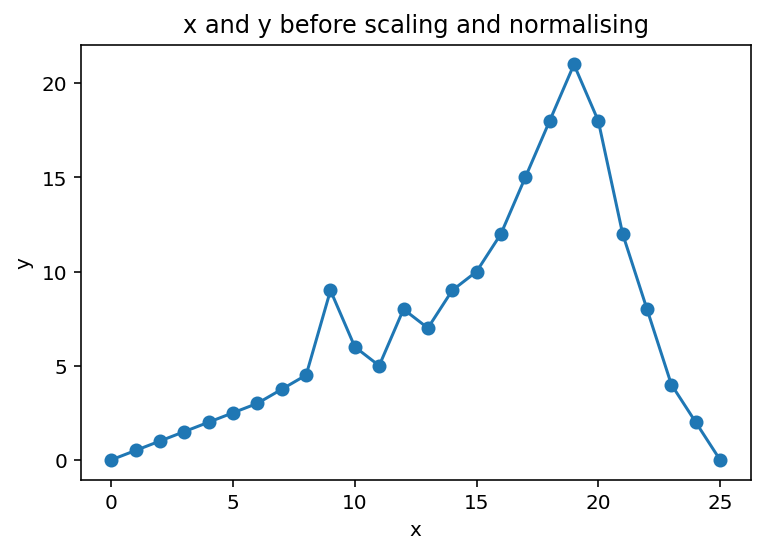

In [6]:
x = df["x"]
y = df["y I made up"]

data = df[["x","y I made up"]]
print(data)

plt.xlabel("x")
plt.ylabel("y")
plt.title("x and y before scaling and normalising")

plt.scatter(x,y)
plt.plot(x,y)

plt.show()

In [7]:
datafit = scaler.fit(data)
print(datafit,"\n\n")

data_scaled = scaler.transform(data)
print(data_scaled)

pee = data_scaled[0]
print(pee)
#x = data_scaled["x"]
#y = data_scaled["y I made up"]

StandardScaler() 


[[-1.66666667 -1.19831396]
 [-1.53333333 -1.11307138]
 [-1.4        -1.0278288 ]
 [-1.26666667 -0.94258622]
 [-1.13333333 -0.85734364]
 [-1.         -0.77210106]
 [-0.86666667 -0.68685848]
 [-0.73333333 -0.55899461]
 [-0.6        -0.43113074]
 [-0.46666667  0.33605248]
 [-0.33333333 -0.175403  ]
 [-0.2        -0.34588816]
 [-0.06666667  0.16556732]
 [ 0.06666667 -0.00491784]
 [ 0.2         0.33605248]
 [ 0.33333333  0.50653764]
 [ 0.46666667  0.84750796]
 [ 0.6         1.35896344]
 [ 0.73333333  1.87041892]
 [ 0.86666667  2.3818744 ]
 [ 1.          1.87041892]
 [ 1.13333333  0.84750796]
 [ 1.26666667  0.16556732]
 [ 1.4        -0.51637332]
 [ 1.53333333 -0.85734364]
 [ 1.66666667 -1.19831396]]
[-1.66666667 -1.19831396]


In [8]:
xx = [0]*27
for i in range(27):
    xx[i] += -5/3 +i*(2/15)
    
yy = [-1.19831396,-1.11307138, -1.0278288, -0.94258622, -0.85734364, -0.77210106, -0.68685848,-0.55899461,-0.43113074,0.33605248,-0.175403,-0.34588816,0.16556732,-0.00491784,0.33605248,0.50653764,0.84750796,1.35896344,1.87041892,2.3818744,1.87041892, 0.84750796,0.16556732,-0.51637332,-0.85734364,-1.19831396,-1.19831396]

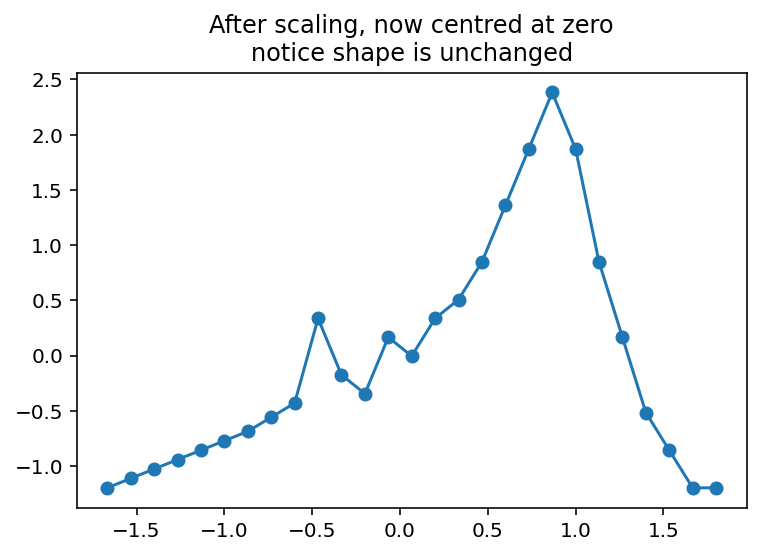

In [9]:
plt.title("After scaling, now centred at zero\nnotice shape is unchanged")

plt.scatter(xx,yy)
plt.plot(xx,yy)

plt.show()

In [10]:
data_scaled = normalize(data_scaled)

print(data_scaled)

[[-0.81192364 -0.58376366]
 [-0.80925798 -0.58745341]
 [-0.80608579 -0.5917987 ]
 [-0.80224822 -0.59699062]
 [-0.7975127  -0.60330216]
 [-0.79152476 -0.6111371 ]
 [-0.78371681 -0.62111831]
 [-0.79529344 -0.60622466]
 [-0.81209186 -0.58352961]
 [-0.81149107  0.58436482]
 [-0.88495717 -0.46567243]
 [-0.50056561 -0.8656986 ]
 [-0.37351361  0.9276247 ]
 [ 0.99729022 -0.07356772]
 [ 0.51142488  0.85932799]
 [ 0.5497142   0.8353528 ]
 [ 0.48234506  0.8759813 ]
 [ 0.40389788  0.91480408]
 [ 0.36501666  0.93100099]
 [ 0.34192792  0.93972618]
 [ 0.47148484  0.88187417]
 [ 0.80084446  0.5988724 ]
 [ 0.99156524  0.12960853]
 [ 0.93821613 -0.34604984]
 [ 0.87282689 -0.48802994]
 [ 0.81192364 -0.58376366]]


In [11]:
data_path = data_path = os.path.join(PATH, "../bullshit/normalised.csv")
df2 = pd.read_csv(data_path)
print(df2)

           x         y
0  -0.884957 -0.465672
1  -0.812092 -0.583530
2  -0.811924 -0.583764
3  -0.811491  0.584365
4  -0.809258 -0.587453
5  -0.806086 -0.591799
6  -0.802248 -0.596991
7  -0.797513 -0.603302
8  -0.795293 -0.606225
9  -0.791525 -0.611137
10 -0.783717 -0.621118
11 -0.500566 -0.865699
12 -0.373514  0.927625
13  0.341928  0.939726
14  0.365017  0.931001
15  0.403898  0.914804
16  0.471485  0.881874
17  0.482345  0.875981
18  0.511425  0.859328
19  0.549714  0.835353
20  0.800844  0.598872
21  0.811924 -0.583764
22  0.872827 -0.488030
23  0.938216 -0.346050
24  0.991565  0.129609
25  0.997290 -0.073568


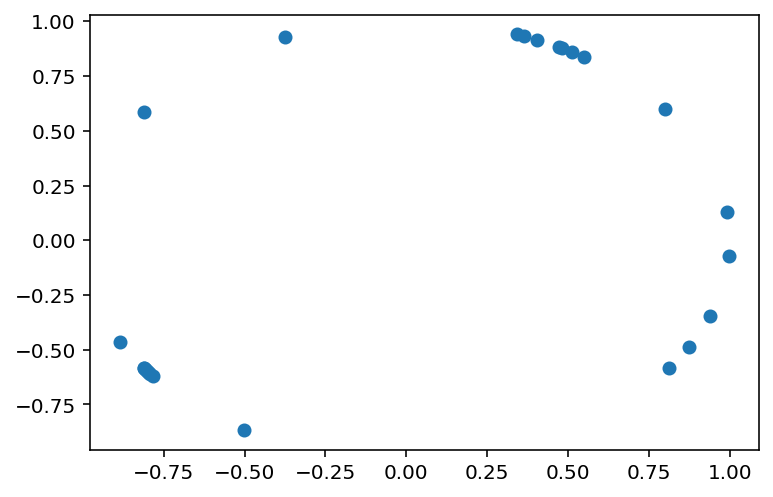

In [18]:
xxx = df2["x"]
yyy = df2["y"]

plt.scatter(xxx,yyy)
#plt.plot(xxx,yyy)

plt.show()

# omg so helpful lol

# train_test_split()

In [13]:
from sklearn.model_selection import train_test_split
data = [20, 4, 12, 9, 0, 10, -3, 17, 2, 25]
output = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

x_train, x_test, y_train, y_test = train_test_split(data, output, test_size = 0.20, random_state = RNG_SEED)

print(f"x_train is\n{x_train}\n\ny_train is\n{x_test}\n\ny_train\n{y_train}\n\ny_test{y_test}")

x_train is
[10, 20, 17, 12, 25, 0, 9, -3]

y_train is
[2, 4]

y_train
[6, 1, 8, 3, 10, 5, 4, 7]

y_test[9, 2]


# generate_features()

# for model_name, model in classic_model_names.items():

In [14]:
#.items() returns key:value dictionary stuff as tuples lists
car = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

x = car.items()

print(x)
print(f"\n\n\n\n car is\n{car}")

dict_items([('brand', 'Ford'), ('model', 'Mustang'), ('year', 1964)])




 car is
{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}


# more plotting stuff

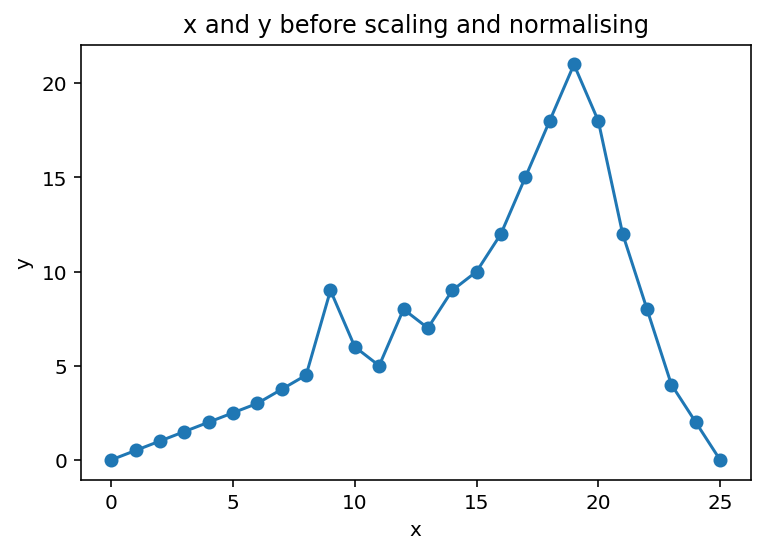

In [15]:
x = df["x"]
y = df["y I made up"]

data = df[["x","y I made up"]]
#print(data)

plt.xlabel("x")
plt.ylabel("y")
plt.title("x and y before scaling and normalising")

plt.scatter(x,y)
plt.plot(x,y)

plt.show()

xy_max = 3005
25
21.0
25.0


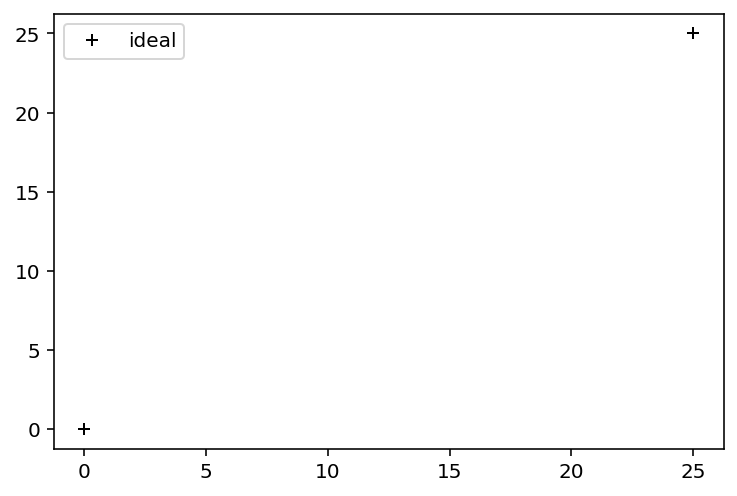

In [16]:
#more than one array
xy_max = np.max([np.max([5,12,32,-3]), np.max([3005,-35,0])])
print(f"xy_max = {xy_max}")

#finding max and plotting ideal line
xy_max = np.max([np.max(x),np.max(y)]) #only one array here so only returns one value

print(np.max(x))
print(np.max(y))

print(xy_max)

plt.plot([0, xy_max], [0, xy_max], "k+", label = 'ideal') #k-- makes dotted line
plt.legend(loc = 'best')            #https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html
plt.show()                          #this explains k++, r+m, etc


In [17]:
splits = range(10)